<a href="https://colab.research.google.com/github/naot97/Implement_Image_Processing/blob/master/denoise_by_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering

In [0]:
import numpy as np
import copy 
from skimage import data
import matplotlib.pyplot as plt
np.random.seed(21)

In [0]:
def noise_generator(noise_type,image):
    if noise_type == "gauss": 
        mean = 0
        sigma = 500 ** 0.5
        gauss = np.random.normal(mean, sigma, image.shape) 
        gauss = gauss.reshape(image.shape)
        noisy = image + gauss
        return noisy.astype(int)
    elif noise_type == "s&p":
        s_vs_p = 0.5
        amount = 0.004
        out = image
        # Generate Salt '1' noise
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 255
        # Generate Pepper '0' noise
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out.astype(int)
    elif noise_type == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy.astype(int)
    elif noise_type =="speckle":
        gauss = np.random.randn(image.shape)
        gauss = gauss.reshape(image.shape)        
        noisy = image + image * gauss
        return noisy.astype(int)
    else:
        return image.astype(int)
    
def show_figure(ori,damaged,out):
    f = plt.figure()
    plt.title('Original')
    plt.imshow(ori)
    plt.show(block=True)
    plt.title('Damaged')
    plt.imshow(damaged)
    plt.show(block=True)
    plt.title('Reconstructed')
    plt.imshow(out)    
    plt.show(block=True)

## Mean Filter

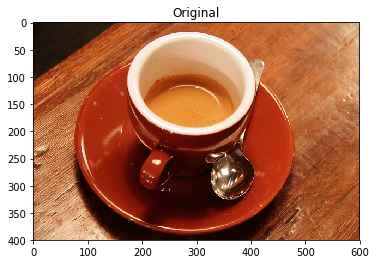

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


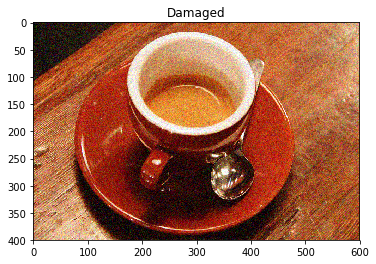

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


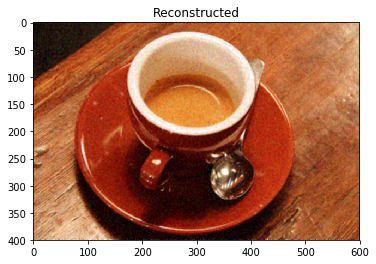

In [4]:
def mean_filter(im, size ):
    m,n = im.shape
    # prepare matrix s
    s = np.zeros(im.shape).astype(int)
    s[0,0] = im[0,0]
    for i in range(1, m):
        s[i,0] = s[i - 1, 0] + im[i,0]
    for j in range(1,n) :
        s[0,j] = s[0, j -1] + im[0,j]
    for i in range(1,m):
        for j in range(1,n):
            s[i,j] = s[i - 1, j] + s[i, j - 1] - s[i - 1, j - 1] + im[i,j]
    # get result im
    result = copy.deepcopy(im)
    h = size // 2
    for i in range(h, m - h - 1):
        for j in range(h, n - h - 1):
            u1 = i - h - 1
            v1 = j - h - 1
            u2 = i + h 
            v2 = j + h
            if u1 >= 0 and v1 >= 0:
                sum = s[u2, v2] - s[u2, v1] - s[u1,v2] + s[u1,v1]
            elif u1 >= 0 :
                sum = s[u2,v2] - s[u1,v2]
            elif v1 >= 0 :
                sum = s[u2,v2] - s[u2,v1]
            else :
                sum = s[u2,v2]
            result[i,j] = sum // (size**2)
    return result.astype(int)

im = data.coffee()
noisy = noise_generator("gauss", im)
result = np.zeros_like(noisy)
for i in range(3): 
    result[:,:,i] = mean_filter(noisy[:,:,i],3)
show_figure(im,noisy,result)

## Median Filter

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


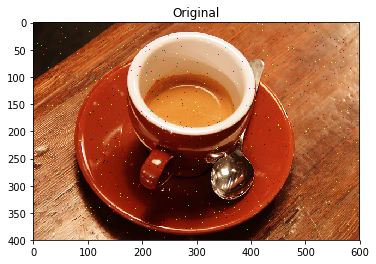

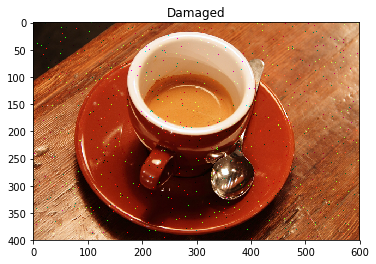

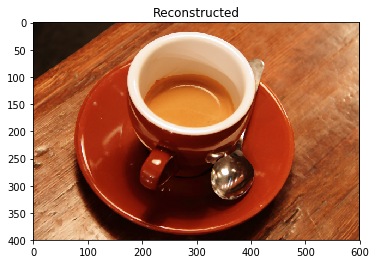

In [5]:
def median_filter(data, filter_size):
      temp = []
      indexer = filter_size // 2
      m,n = data.shape
      data_final = np.zeros_like(data)
      for i in range(m):
          for j in range(n):
              for z in range(filter_size):
                  if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                      for c in range(filter_size):
                          temp.append(0)
                  else:
                      if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                          temp.append(0)
                      else:
                          for k in range(filter_size):
                              temp.append(data[i + z - indexer][j + k - indexer])

              temp.sort()
              data_final[i][j] = temp[len(temp) // 2]
              temp = []
      return data_final
    
im = data.coffee()
noisy = noise_generator("s&p", im)
result = np.zeros_like(noisy)
for i in range(3): 
    result[:,:,i] = median_filter(noisy[:,:,i],3)
show_figure(im,noisy,result)